### 【問題1】中心点の初期値を決める
### 【問題2】SSEを求める関数の作成
### 【問題3】クラスタへの割り当て
### 【問題4】中心点の移動
### 【問題5】繰り返し
### 【問題6】異なる初期値で計算
### 【問題7】推定

In [1]:
import numpy as np
import itertools 

class KMeans:
    def __init__(self, n_clusters, max_iter = 1000, random_seed = 0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)

    def fit(self, X):
        #指定したクラスター数分のラベルを繰り返し作成するジェネレータを生成（0,1,2,0,1,2,0,1,2...みたいな感じ）
        cycle = itertools.cycle(range(self.n_clusters))
        #各データポイントに対してクラスタのラベルをランダムに割り振る
        self.labels_ = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype = np.int)
        self.random_state.shuffle(self.labels_)
        labels_prev = np.zeros(X.shape[0])
        count = 0
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))

        #各データポイントが属しているクラスターが変化しなくなった、又は一定回数の繰り返しを越した場合は終了
        while (not (self.labels_ == labels_prev).all() and count < self.max_iter):
            #その時点での各クラスターの重心を計算する
            for i in range(self.n_clusters):
                XX = X[self.labels_ == i, :]
                self.cluster_centers_[i, :] = XX.mean(axis = 0)
            #各データポイントと各クラスターの重心間の距離を総当たりで計算する
            dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis = 1)
            #1つ前のクラスターラベルを覚えておく。1つ前のラベルとラベルが変化しなければプログラムは終了する。
            labels_prev = self.labels_
            #再計算した結果、最も距離の近いクラスターのラベルを割り振る
            self.labels_ = dist.argmin(axis = 1)
            count += 1

    def predict(self, X):
        dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis = 1)
        labels = dist.argmin(axis = 1)
        return labels

In [2]:
import matplotlib.pyplot as plt

#適当なデータセットを作成する
np.random.seed(0)
points1 = np.random.randn(80, 2)
points2 = np.random.randn(80, 2) + np.array([4,0])
points3 = np.random.randn(80, 2) + np.array([5,8])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

#3つのクラスタに分けるモデルを作成
model =  KMeans(3)
model.fit(points)

print(model.labels_)

[1 0 2 1 0 0 2 0 1 2 0 0 2 0 2 2 0 0 2 1 2 0 1 2 0 1 2 1 0 1 0 0 0 2 0 2 0
 1 1 0 0 0 0 1 2 0 0 0 2 1 0 2 1 0 2 0 2 1 1 1 1 1 0 2 0 2 2 0 0 0 0 0 2 0
 2 2 2 1 0 2 1 2 0 0 2 0 1 2 1 1 1 2 2 2 1 2 2 2 1 2 1 0 0 0 0 0 2 0 1 0 1
 2 0 1 1 0 1 2 1 1 1 2 2 1 2 1 0 1 1 2 0 1 0 1 1 1 0 2 1 0 0 1 2 2 2 1 0 0
 0 2 2 2 0 0 1 2 0 2 2 2 1 2 2 2 2 2 1 1 0 1 2 1 1 2 0 1 1 1 1 0 2 1 0 1 1
 2 1 2 2 2 1 2 0 1 2 2 2 0 0 0 0 1 1 2 1 1 1 2 2 0 0 1 1 2 0 0 1 0 1 1 2 1
 0 1 2 1 0 1 2 2 1 1 2 1 2 1 0 1 1 2]


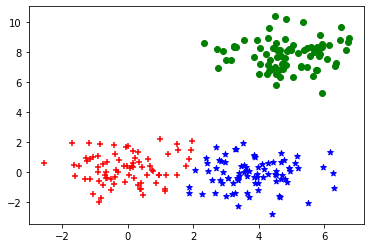

In [4]:
markers = ["+", "*", "o"]
color = ['r', 'b', 'g']
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], marker = markers[i], color = color[i])
plt.show()

### 【問題8】エルボー法の実装

### 【問題10】クラスタ数kの選択

### 【問題11】既知のグループとの比較

### 【問題12】卸売業者にとって有益な情報